<a href="https://colab.research.google.com/github/anki079/CAP4630_AI_Fall2019/blob/master/HW1/HW_1_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Ankita Tripathi**

**NID: an164739**

**CAP4630 Homework 1**: **Problem 2**

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [0]:
import numpy as np
np.random.seed(42)
# getting x1 and x2 feature values
xs1 = 2 * np.random.rand(100, 1)
xs2 = 2 * np.random.rand(100, 1)
# creating an array of labels
ys = 4 + 3 * xs1 + 2 * xs2 + np.random.rand(100, 1)


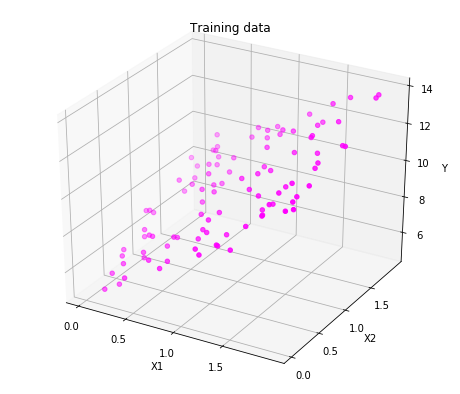

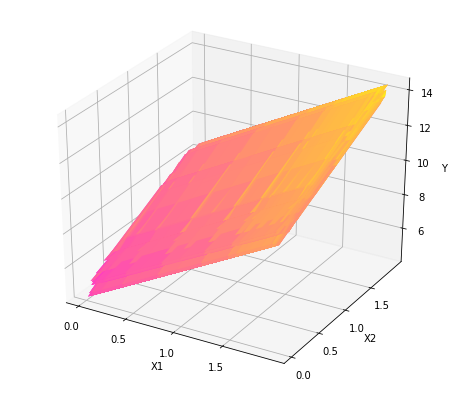

In [0]:
# 3d scatterplot of training data.
x = xs1.flatten()
y = xs2.flatten()
z = ys.flatten()
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111,projection='3d')

ax.scatter3D(x,y,z, c='magenta',marker = 'o')
plt.xticks(np.arange(0,2,0.5))
plt.yticks(np.arange(0,2,0.5))
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
plt.title("Training data")


plt.show()

# #3d surface of best fit

X, Y = np.meshgrid(x,y)
Z = 4 + 3 * X + 2 * Y + np.random.rand(100, 1)

fig = plt.figure(figsize = (8,7))
ax = fig.add_subplot(111, projection='3d')

plt.xticks(np.arange(0,2,0.5))
plt.yticks(np.arange(0,2,0.5))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='spring', edgecolor='none')
plt.show()



In [0]:
# split the data into training and test sets
# train set
train_xs1 = xs1[:80]
train_xs2 = xs2[:80]
train_ys = ys[:80]
# test set
test_xs1 = xs1[80:]
test_xs2 = xs2[80:]
test_ys = ys[80:]


# Linear regression using numpy


In [0]:
# number of epochs
epochs = 10
# learning rate
lr = 0.01

In [0]:
# initial value for weights w1, w2 and bias b
w1 = np.random.randn(1)
w2 = np.random.randn(1)
b = np.zeros(1)


In [0]:
for epoch in np.arange(epochs):
  for i in np.arange(80):
    y_pred = w1 * train_xs1[i] + w2 * train_xs2[i] + b
    #y' = wx + b
    
    grad_w1 = (y_pred - train_ys[i]) * train_xs1[i]
    grad_w2 = (y_pred - train_ys[i]) * train_xs2[i]
    
    grad_b = (y_pred - train_ys[i])
    
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    b -= lr * grad_b

In [0]:
# Loss fn is mean squared error. (1/m) <summation from 1 to m> (y-y')^2
test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w1 * test_xs1[i] + w2 * test_xs2[i] + b - test_ys[i]) ** 2
test_loss /= 20

In [0]:
test_loss

array([0.0745423])

In [0]:
# computing predicted value of y: y' = w1x1 + w2x2 + b
pred_ys = w1 * test_xs1 + w2 * test_xs2 + b

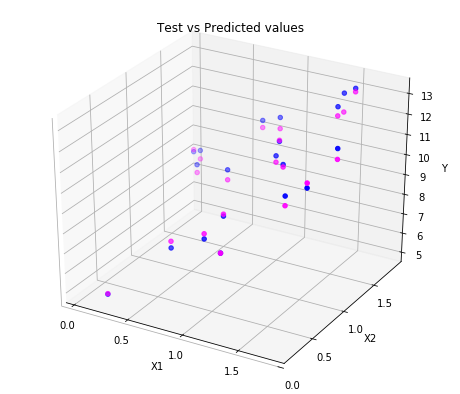

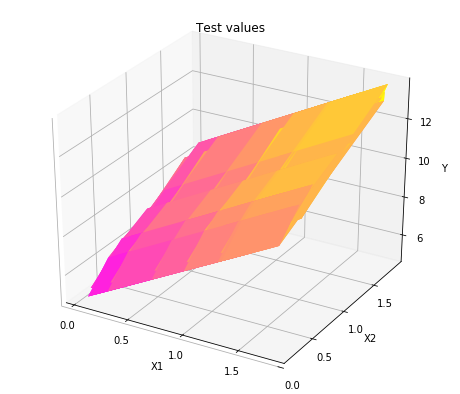

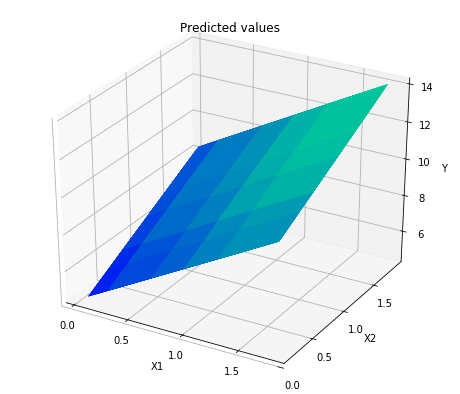

In [0]:
# 3d scatterplot of test values and predicted values.

x = test_xs1.flatten()
y = test_xs2.flatten()
#z = test_ys.flatten()

fig = plt.figure(figsize = (8,7))
ax = fig.add_subplot(111,projection='3d')


ax.scatter3D(test_xs1,test_xs2,test_ys, c='magenta',marker = 'o')
ax.scatter3D(test_xs1,test_xs2,pred_ys, c='blue',marker = 'o')
plt.xticks(np.arange(0,2,0.5))
plt.yticks(np.arange(0,2,0.5))
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
plt.title("Test vs Predicted values")

plt.show()

#3d surface of best fit for test values

fig = plt.figure(figsize = (8,7))
ax = fig.add_subplot(111,projection='3d')
X, Y = np.meshgrid(x,y)

#function for test_ys values
z = 4 + 3 * X + 2 * Y + np.random.rand(20,1)

plt.xticks(np.arange(0,2,0.5))
plt.yticks(np.arange(0,2,0.5))
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.plot_surface(X,Y,z, rstride = 1, cstride = 1, cmap = 'spring')
plt.title("Test values")
plt.show()

#3d surface of best fit for predicted values

fig = plt.figure(figsize = (8,7))
ax = fig.add_subplot(111,projection='3d')
X, Y = np.meshgrid(x,y)
#function for predicted values
Z = w1 * X + w2 * Y + b

plt.xticks(np.arange(0,2,0.5))
plt.yticks(np.arange(0,2,0.5))
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.plot_surface(X,Y,Z, rstride = 1, cstride = 1, cmap = 'winter')
plt.title("Predicted values")


plt.show()

In [0]:
b

array([3.86016617])

In [0]:
w1

array([3.3176748])

In [0]:
w2

array([2.35912799])